# Required Libraries Import

In [165]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge, RidgeCV, LogisticRegressionCV, LogisticRegression, Ridge
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
import dmba
from dmba import regressionSummary, exhaustive_search, backward_elimination, forward_selection, stepwise_selection, adjusted_r2_score, AIC_score, BIC_score
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from skopt import BayesSearchCV
from sklearn.datasets import load_diabetes
from skopt.space import Real
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from scipy.stats import reciprocal, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.exceptions import ConvergenceWarning
import scipy.stats as stats
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


import warnings
# Suppress specific Seaborn warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

warnings.filterwarnings("ignore", category=ConvergenceWarning)

%matplotlib inline

# Import Datasets

### First dataset = day.csv

In [166]:
# Load the CSV file into a DataFrame
df_day = pd.read_csv('day.csv')
df_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Second dataset = hour.csv

In [167]:
# Load the CSV file into a DataFrame
df_hour = pd.read_csv('hour.csv')
df_hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

## Descriptive Statistics and Exploration 
### Day Dataframe

In [168]:
# Describibg df_day dataset
df_day.describe().T

count         mean          std        min          25%  \
instant     731.0   366.000000   211.165812   1.000000   183.500000   
season      731.0     2.496580     1.110807   1.000000     2.000000   
yr          731.0     0.500684     0.500342   0.000000     0.000000   
mnth        731.0     6.519836     3.451913   1.000000     4.000000   
holiday     731.0     0.028728     0.167155   0.000000     0.000000   
weekday     731.0     2.997264     2.004787   0.000000     1.000000   
workingday  731.0     0.683995     0.465233   0.000000     0.000000   
weathersit  731.0     1.395349     0.544894   1.000000     1.000000   
temp        731.0     0.495385     0.183051   0.059130     0.337083   
atemp       731.0     0.474354     0.162961   0.079070     0.337842   
hum         731.0     0.627894     0.142429   0.000000     0.520000   
windspeed   731.0     0.190486     0.077498   0.022392     0.134950   
casual      731.0   848.176471   686.622488   2.000000   315.500000   
registered  731.0  3656.172367  1560.256377  20.000000  2497.000000   
cnt         731.0  4504.348837  1937.211452  22.000000  3152.000000   

                    50%          75%          max  
instant      366.000000   548.500000   731.000000  
season         3.000000     3.000000     4.000000  
yr             1.000000     1.000000     1.000000  
mnth           7.000000    10.000000    12.000000  
holiday        0.000000     0.000000     1.000000  
weekday        3.000000     5.000000     6.000000  
workingday     1.000000     1.000000     1.000000  
weathersit     1.000000     2.000000     3.000000  
temp           0.498333     0.655417     0.861667  
atemp          0.486733     0.608602     0.840896  
hum            0.626667     0.730209     0.972500  
windspeed      0.180975     0.233214     0.507463  
casual       713.000000  1096.000000  3410.000000  
registered  3662.000000  4776.500000  6946.000000  
cnt         4548.000000  5956.000000  8714.000000

In [169]:
# Get datatypes for df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [170]:
# Identify null values
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [171]:
# Get the shape of the df_day dataframe
df_day.shape

(731, 16)

### Hour dataframe

In [172]:
# Describing the df_hour dataset
df_hour.describe().T

count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

In [173]:
# Get data types for df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [174]:
# Identify null values
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [175]:
# Get shape of df_hour dataframe
df_hour.shape

(17379, 17)

## Add Revenue Information

### Note: revenue numbers are real prices taken from the LA bike share program

In [176]:
# Define the cost per hour for casual and registered, in dollars:
casual_cost_per_hour = 3.50
registered_cost_per_hour = 0.08

In [177]:
# Create new columns for Casual_Revenue, Registered_Revenue, and Total_Revenue
df_hour['Casual_Revenue'] = df_hour['casual'] * casual_cost_per_hour
df_hour['Registered_Revenue'] = df_hour['registered'] * registered_cost_per_hour
df_hour['Total_Revenue'] = df_hour['Casual_Revenue'] + df_hour['Registered_Revenue']


# EDA and Preprocessing

### Barplot of bike usage by season, df_day
Purpose: gives us insights to see how balanced the data instances are by season in df_day.

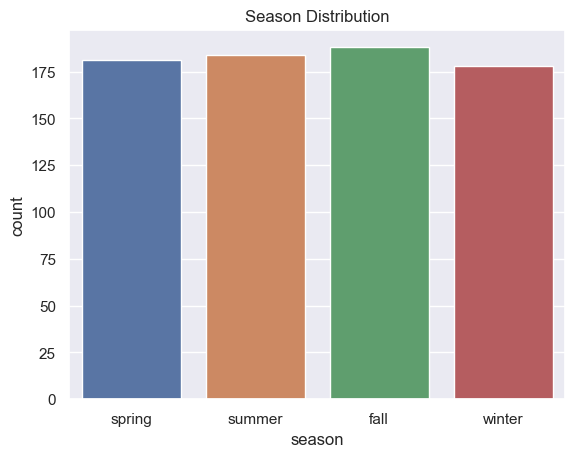

In [178]:
# Create a dictionary to map numerical values to season names
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Create a copy of the Dataframe
new_day = df_day.copy()

# Map the season column
new_day['season'] = new_day['season'].map(season_mapping)

# Convert the 'season' column to categorical type
new_day['season'] = pd.Categorical(new_day['season'], categories=['spring', 'summer', 'fall', 'winter'], ordered=True)

# Visualize the distribution of seasons using a count plot
sns.set(style="darkgrid")
sns.countplot(x=new_day['season'])
plt.title('Season Distribution')
plt.show()

### Barplot of bike usage by season, df_hour
Purpose: gives us insights to see how balanced the data instances are by season in df_hour.

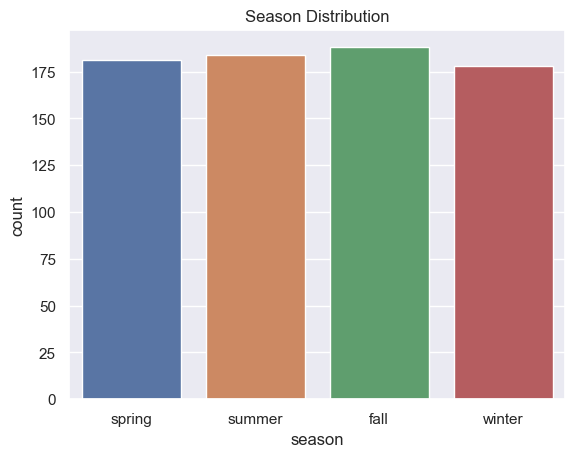

In [179]:
# Create a dictionary to map numerical values to season names
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Create a copy of the DataFrame
new_hour = df_hour.copy()

# Map the season column
new_hour['season'] = new_hour['season'].map(season_mapping)

# Convert the 'season' column to categorical type
new_hour['season'] = pd.Categorical(new_hour['season'], categories=['spring', 'summer', 'fall', 'winter'], ordered=True)

# Visualize the distribution of seasons using a count plot
sns.set(style="darkgrid")
sns.countplot(x=new_day['season'])
plt.title('Season Distribution')
plt.show()

### Boxplots and histograms for season, registered, temp for df_day
Purpose: gives insights into the distribution of instances for season, registered flag (meaning the bikes were used by registered and not single users), and temperature for df_day. 

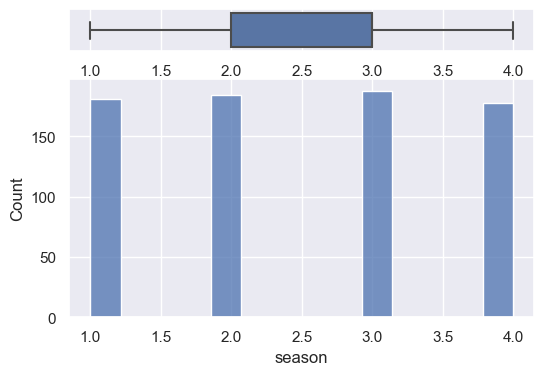

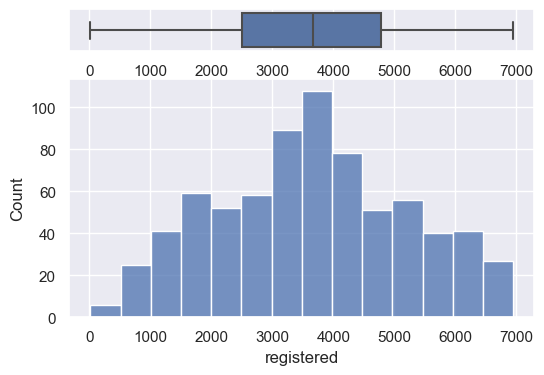

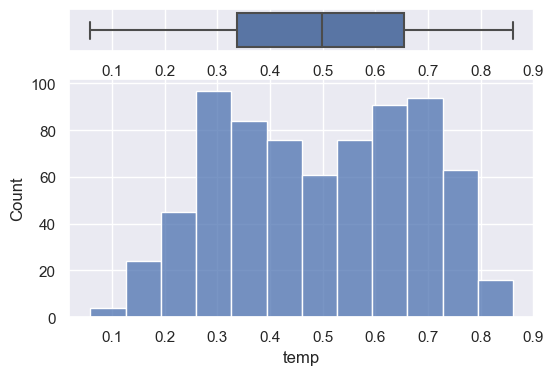

In [180]:
def print_box_hist(data, data1):
    sns.set(style="darkgrid")
    
    # Create a 2x1 grid of subplots
    f, axes = plt.subplots(2, 1, figsize=(6, 4), gridspec_kw={"height_ratios": (.15, .85)})
    
    # Boxplot
    sns.boxplot(data, x=data1, orient="h", ax=axes[0])
    # Histogram
    sns.histplot(data, x=data1, ax=axes[1])

    # Removing X-axis Labels for Boxplot
    axes[0].set(xlabel='')
    
    plt.show()

print_box_hist(df_day, "season")
print_box_hist(df_day, "registered")
print_box_hist(df_day, "temp")


### Boxplots and histograms for season, registered, temp for df_hour
Purpose: gives us insights into the distribution of instances for season, registered flag (meaning the bikes were used by registered and not single users), and temperature for df_hour. 

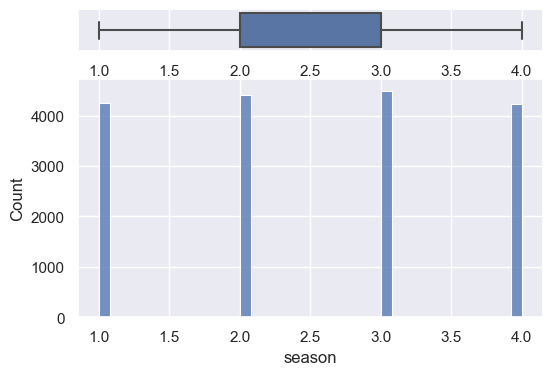

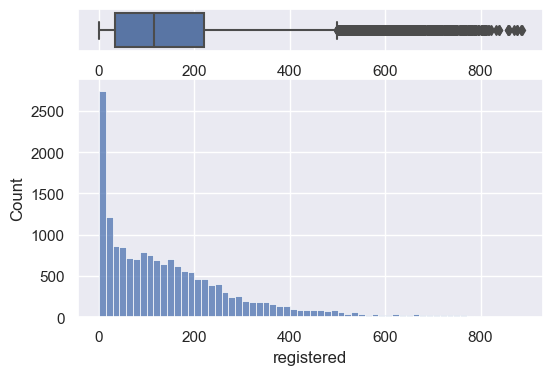

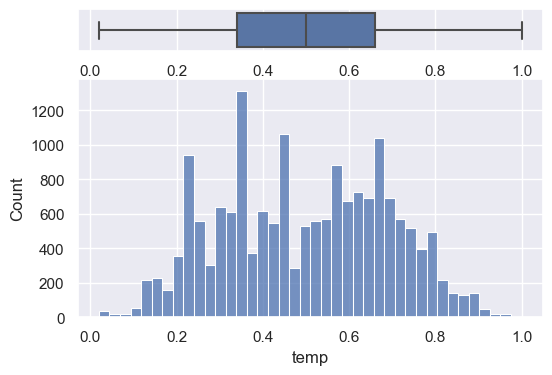

In [181]:
print_box_hist(df_hour, "season")
print_box_hist(df_hour, "registered")
print_box_hist(df_hour, "temp")

### Correlation Matrix for numerical columns, df_day
Purpose: gives insights into how related the variables are to one another for df_day. This is useful to address multicollinearity concerns, as having variables that are all alike to each other can obscure the model results.

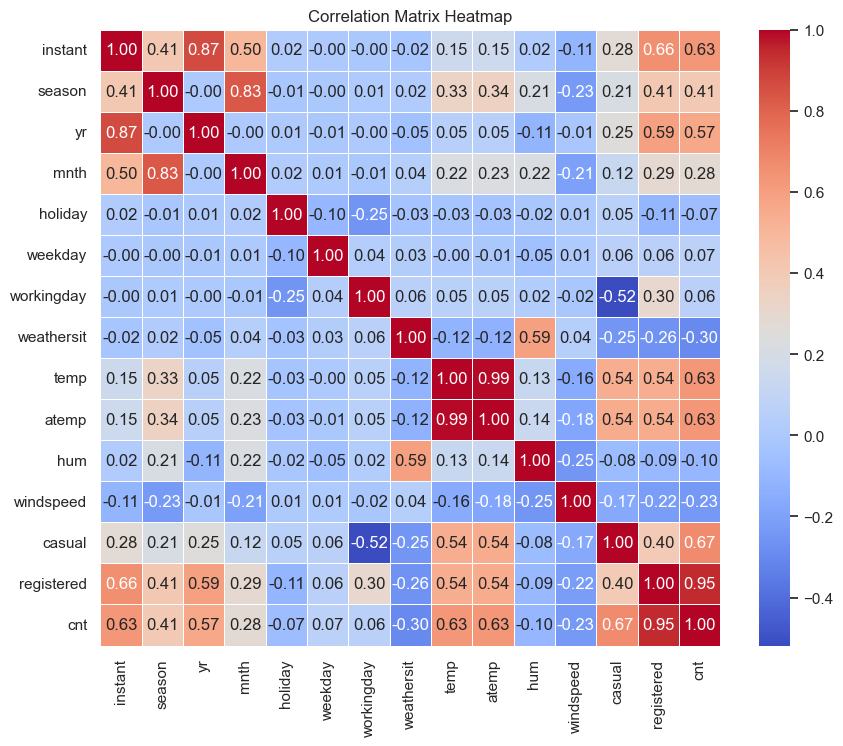

In [182]:
# Numerical columns for the correlation matrix
numerical_columns = df_day.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Correlation Matrix for numerical columns, df_hour
Purpose: gives insights into how related the variables are to one another for df_hour. This is useful to address multicollinearity concerns, as having variables that are all alike to each other can obscure the model results.

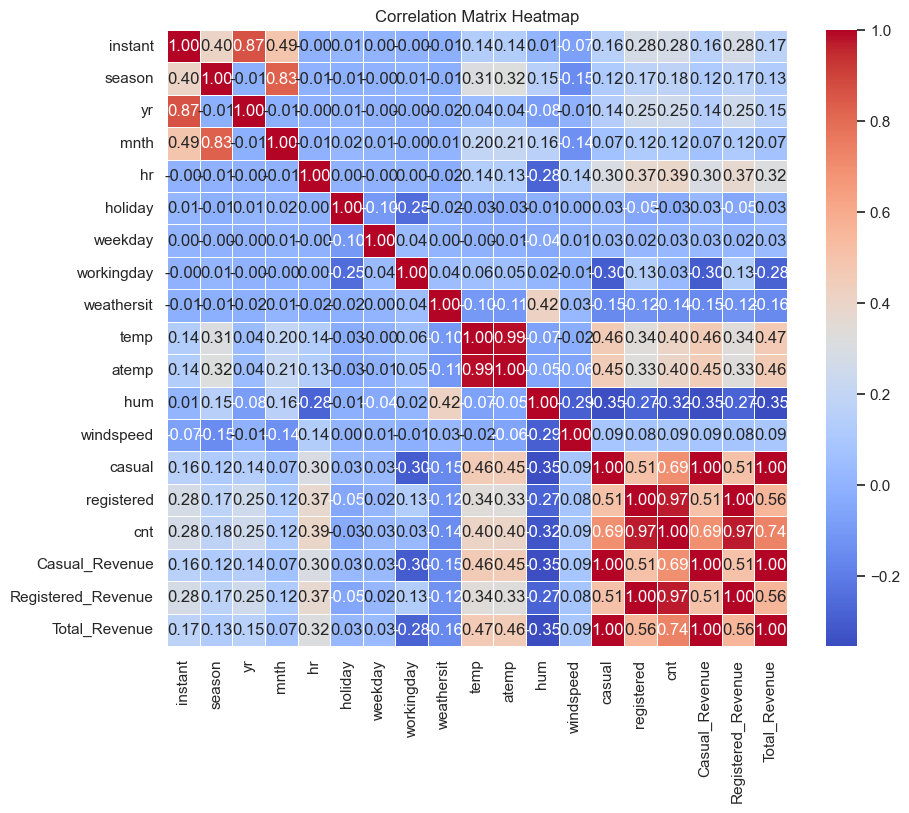

In [183]:
# Numerical columns for the correlation matrix
numerical_columns = df_hour.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Creates a grid of Quantile-Quantile plot and Histogram of Registered People, Month, and temperature, df_day
Purpose: the histograms provide insights into the distribution of values in each column, while the QQ plots show how closely each distribution matches a normal distribution.

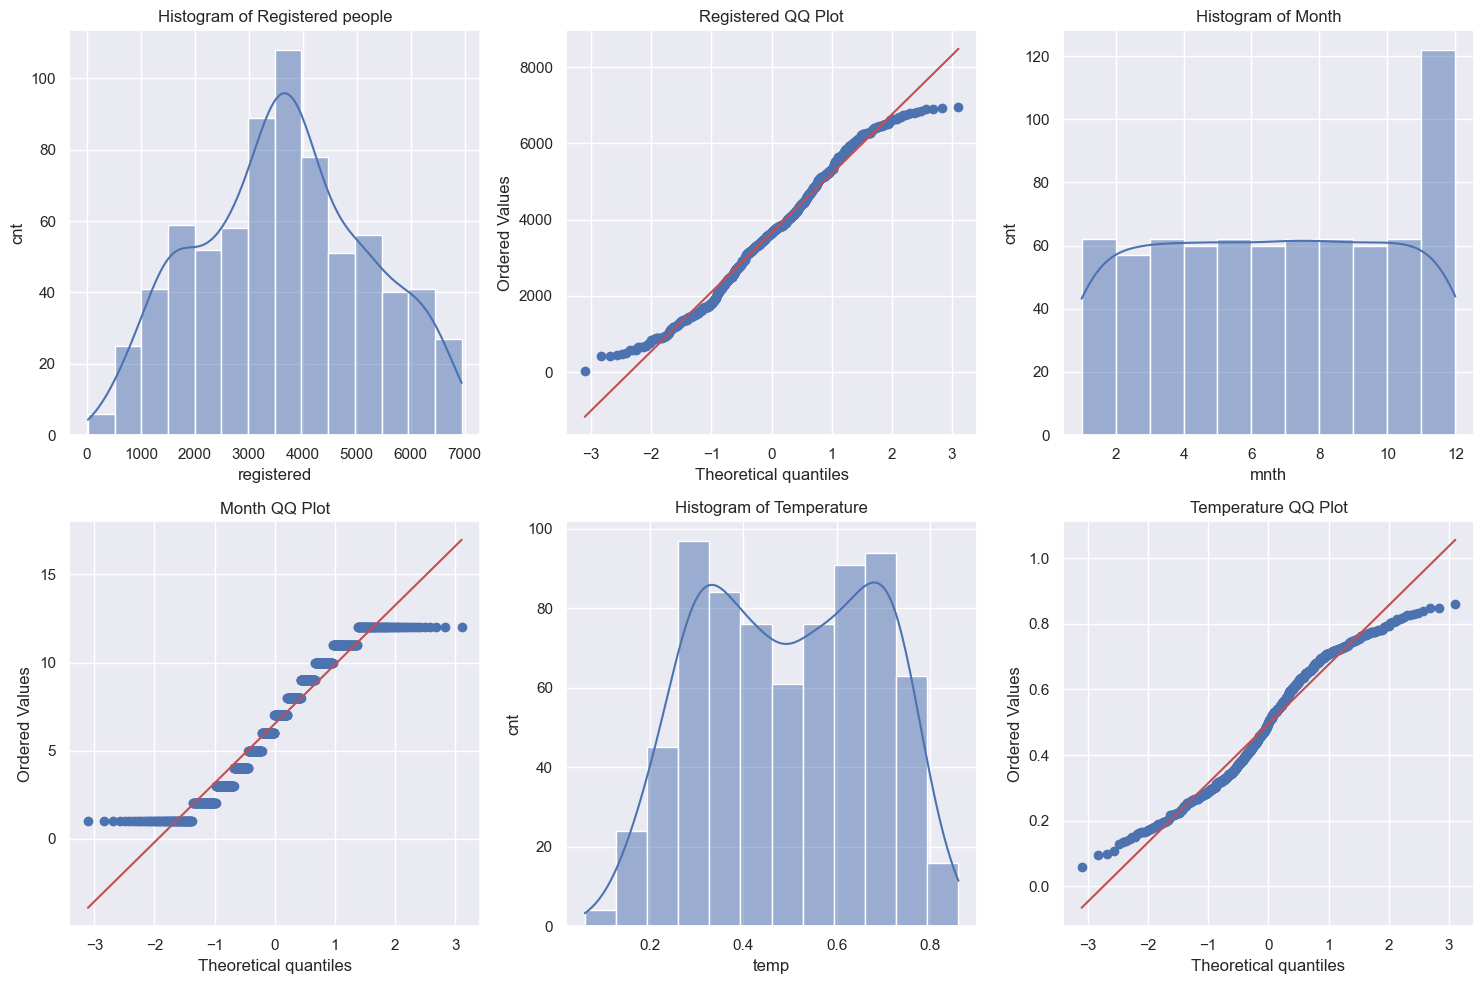

In [184]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
# Plot a histogram with KDE for the 'registered' column of the df_day DataFrame
sns.histplot(df_day['registered'], kde=True)
plt.ylabel("cnt")
plt.title("Histogram of Registered people")

plt.subplot(2, 3, 2)
# Generate a QQ plot for the 'registered' column comparing it to a normal distribution
stats.probplot(df_day['registered'], dist="norm", plot=plt)
plt.title('Registered QQ Plot')

plt.subplot(2, 3, 3)
# Plot a histogram with KDE for the 'mnth' column of the df_day DataFrame
sns.histplot(df_day['mnth'], kde=True)
plt.ylabel("cnt")
plt.title("Histogram of Month")

plt.subplot(2, 3, 4)
# Generate a QQ plot for the 'mnth' column comparing it to a normal distribution
stats.probplot(df_day['mnth'], dist="norm", plot=plt)
plt.title('Month QQ Plot')

plt.subplot(2, 3, 5)
# Plot a histogram with KDE for the 'temp' column of the df_day DataFrame
sns.histplot(df_day['temp'], kde=True)
plt.ylabel("cnt")
plt.title("Histogram of Temperature")

plt.subplot(2, 3, 6)
# Generate a QQ plot for the 'temp' column comparing it to a normal distributiona
stats.probplot(df_day['temp'], dist="norm", plot=plt)
plt.title('Temperature QQ Plot')

plt.tight_layout()
plt.show()


### Heatmap showing hourly bike rentals by day of the week
Purpose: shows insights into patterns around bike usage for all 162 hours of the week on average for df_hour.

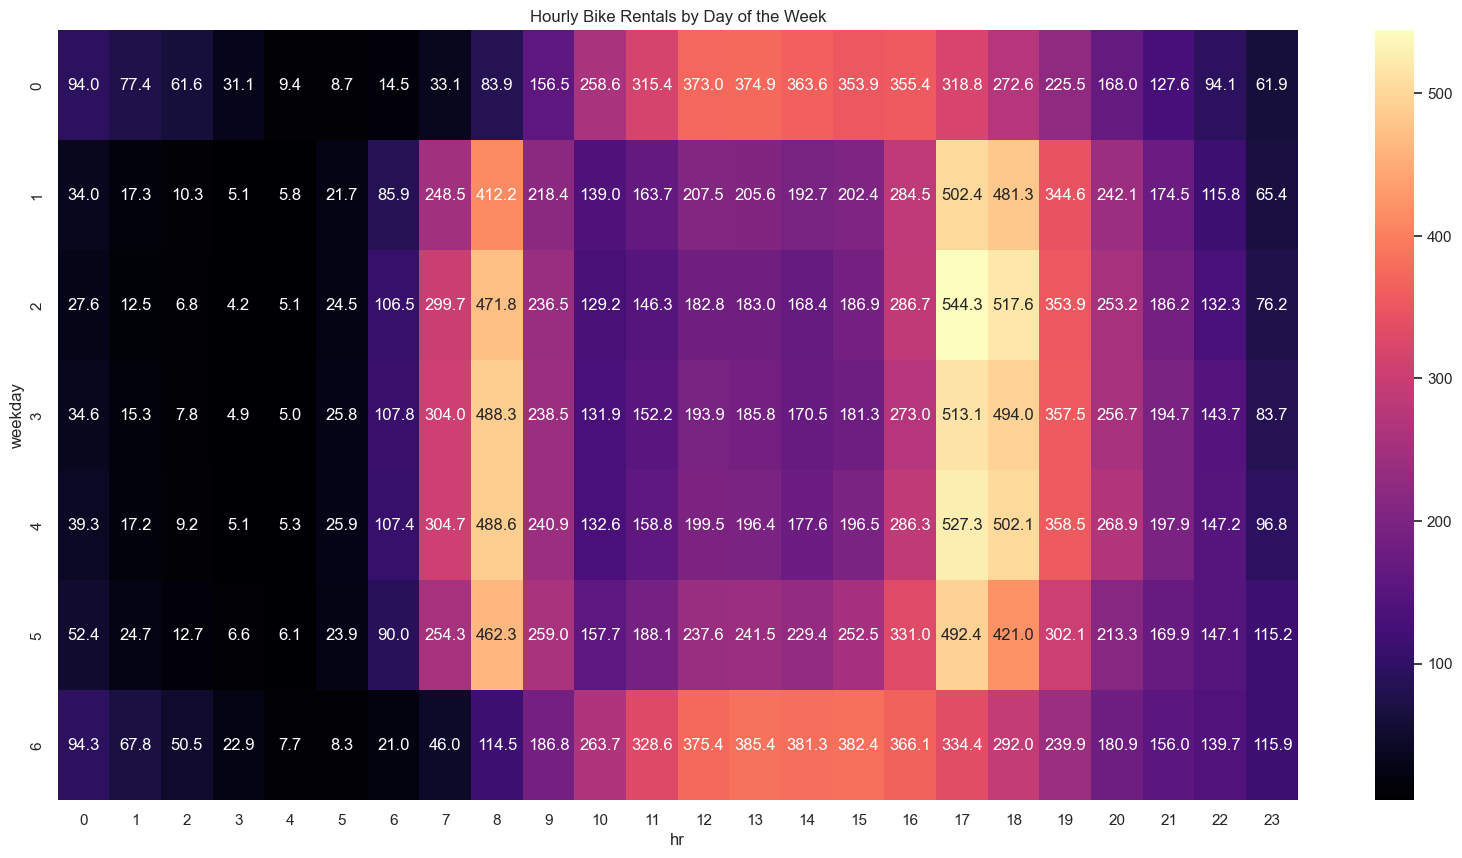

In [185]:
# Create a pivot table for the heatmap
heatmap_data = df_hour.pivot_table(index='weekday', columns='hr', values='cnt', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f')
plt.title('Hourly Bike Rentals by Day of the Week')
plt.show()

### Heatmap showing day of the week bike rentals by season
Purpose: shows insights into patterns around bike usage for all 162 hours of the week on average for df_hour.

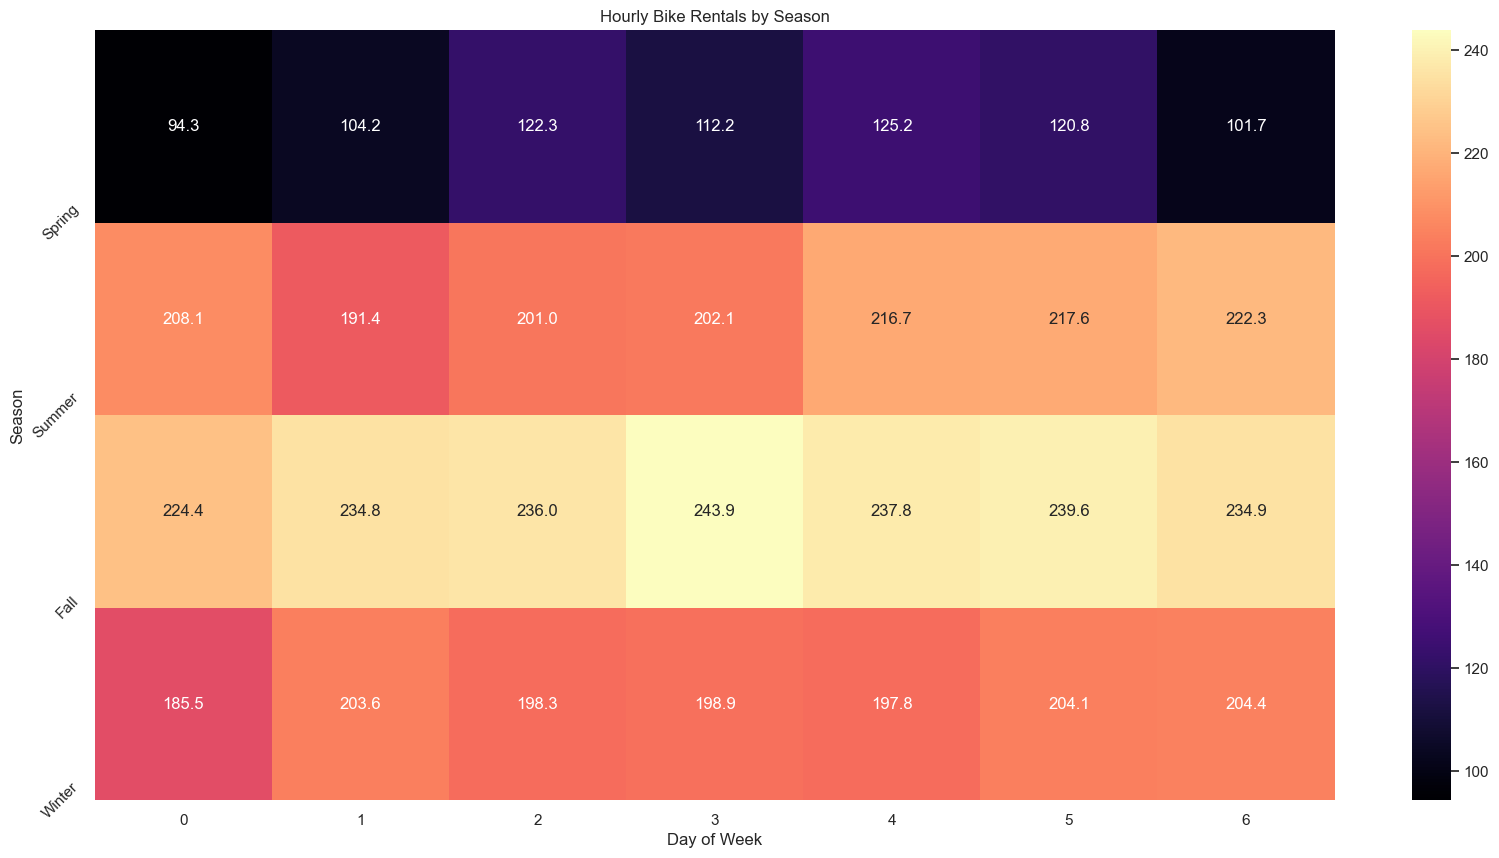

In [186]:
heatmap_data = df_hour.pivot_table(index='season', columns='weekday', values='cnt', aggfunc='mean')

# Define season labels
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f', xticklabels=range(7))
plt.title('Hourly Bike Rentals by Season')
plt.xlabel('Day of Week')
plt.ylabel('Season')
plt.xticks(rotation=0) 
plt.yticks(ticks=range(1, 5), labels=season_labels, rotation=45) 
plt.show()

### Heatmap showing day of the week bike rentals by season
Purpose: shows insights into patterns around bike usage for 7 days of the week on average for df_day.

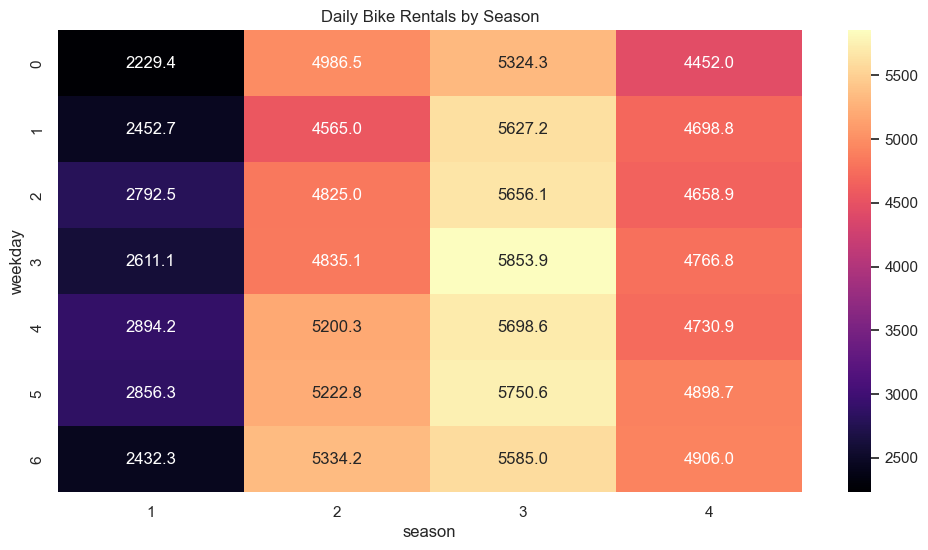

In [187]:
# Create a pivot table for the heatmap
heatmap_data = df_day.pivot_table(index='weekday', columns='season', values='cnt', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f')
plt.title('Daily Bike Rentals by Season')
plt.show()

### Heatmap of hourly bike rental averages per season by weekday
Purpose: get an average across weekdays of bike rentals per season.

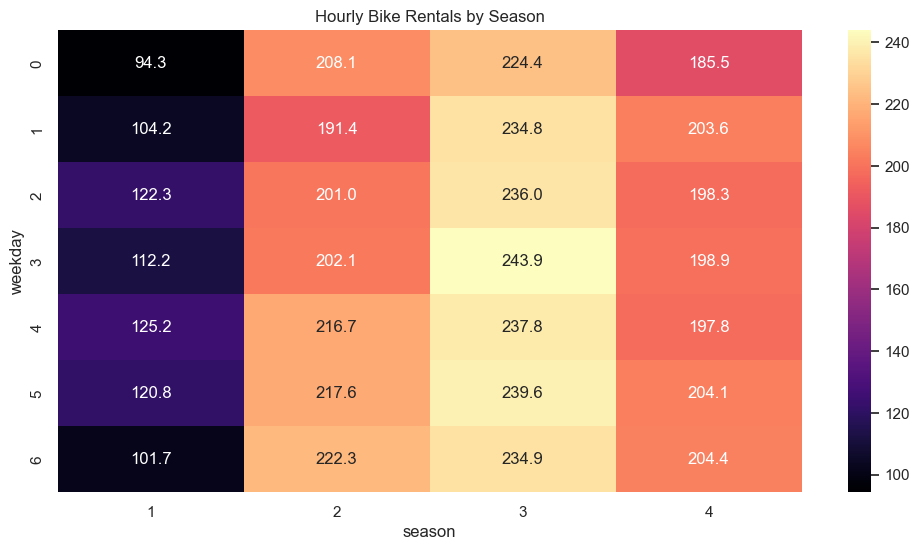

In [188]:
# Create a pivot table for the heatmap
heatmap_data = df_hour.pivot_table(index='weekday', columns='season', values='cnt', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='magma', annot=True, fmt='.1f')
plt.title('Hourly Bike Rentals by Season')
plt.show()

### Time Series of Average Bike Rentals by hour, aggregated as an average for df_hour
Purpose: gives insights into peak hours for bike rentals

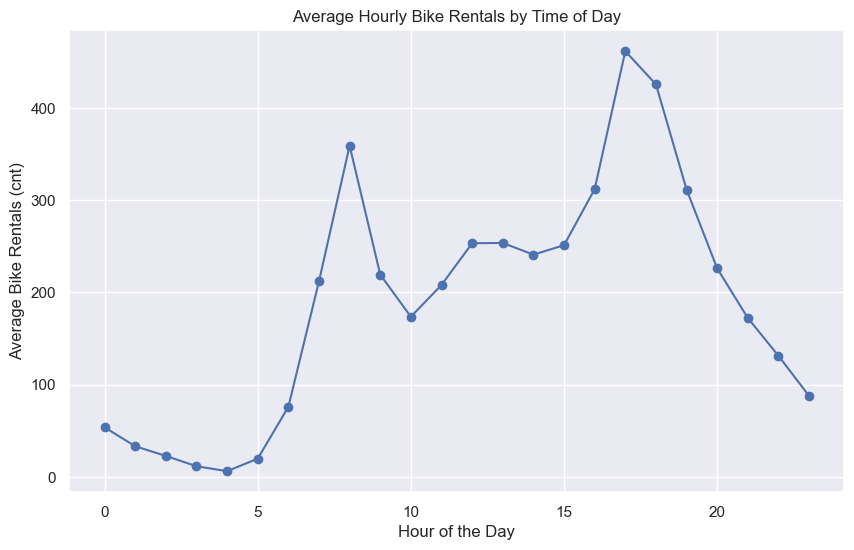

In [189]:
#Plot average Hourly bike rentals by time of day

hourly_average = df_hour.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Hourly Bike Rentals by Time of Day')
plt.grid(True)
plt.show()

### Time Series of Average Bike Rentals by temperature, aggregated as an average for df_hour
Purpose: gives insights into average bike rentals based on the outside temperature for df_hour.

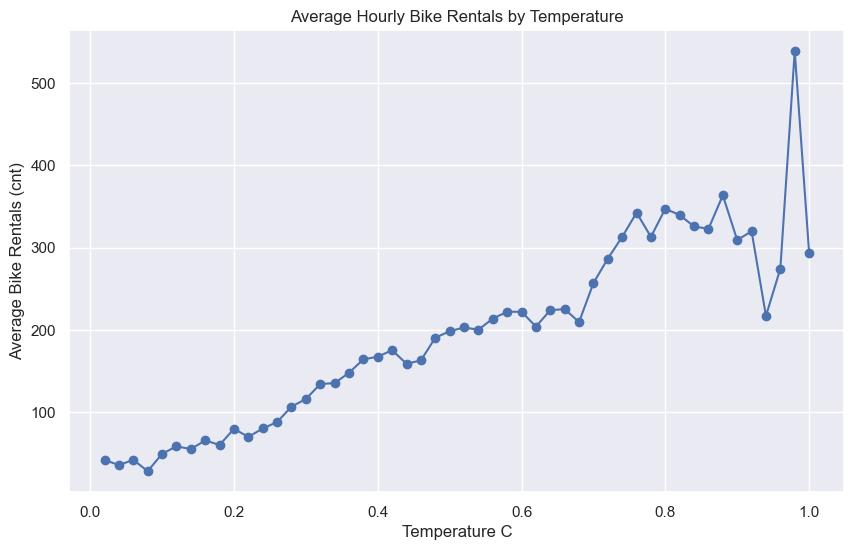

In [190]:
#Plot average Hourly bike rentals by time of day

hourly_average = df_hour.groupby('temp')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-')
plt.xlabel('Temperature C')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Hourly Bike Rentals by Temperature')
plt.grid(True)
plt.show()

### Time Series of Average Bike Rentals by season, aggregated as an average per day for df_hour
Purpose: gives insights into into average bike rentals per day by season.

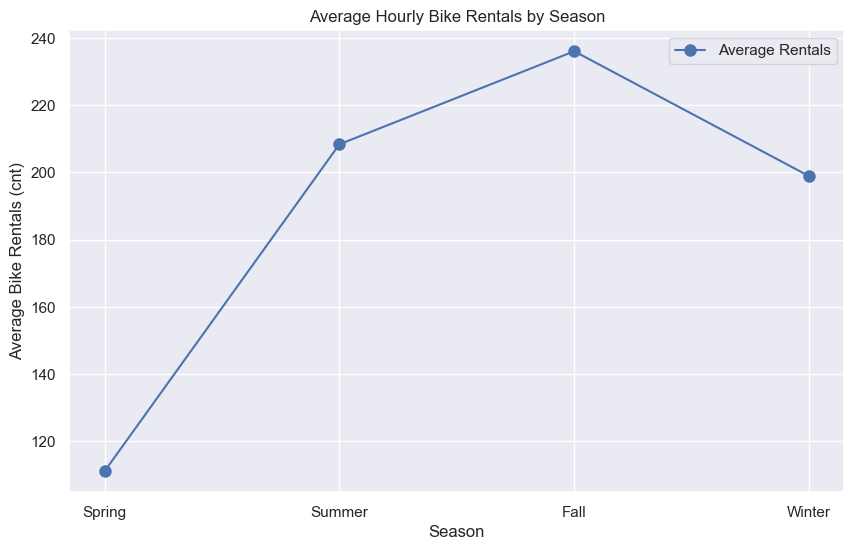

In [191]:
#Plot average daily bike rentals by season
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

hourly_average = df_hour.groupby('season')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-', color='b', markersize=8, label='Average Rentals')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Hourly Bike Rentals by Season')
plt.xticks(hourly_average.index, season_names)
plt.grid(True)
plt.legend()
plt.show()

### Time Series of Average Bike Rentals by season, aggregated as an average per day for df_day
Purpose: gives insights into into average bike rentals per day by season.

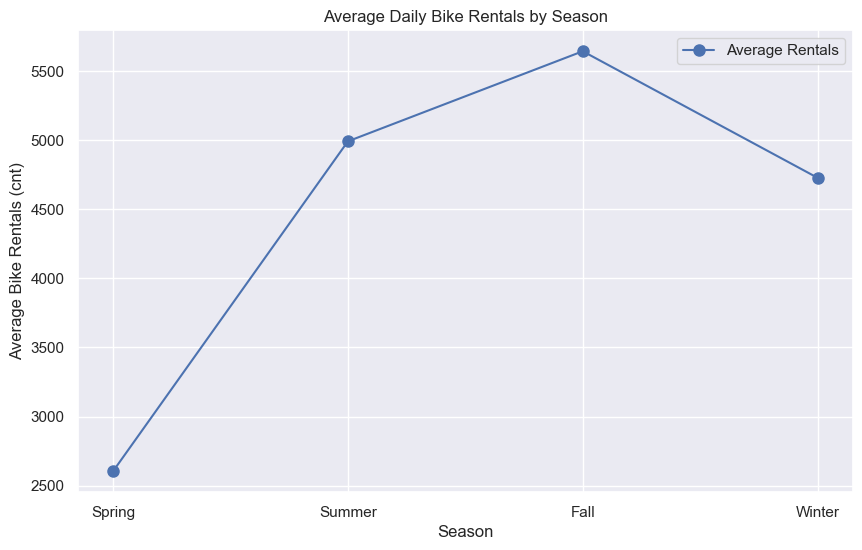

In [192]:
#Plot average daily bike rentals by season
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

hourly_average = df_day.groupby('season')['cnt'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_average.index, hourly_average.values, marker='o', linestyle='-', color='b', markersize=8, label='Average Rentals')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Daily Bike Rentals by Season')
plt.xticks(hourly_average.index, season_names)
plt.grid(True)
plt.legend()
plt.show()

### Bar plot of average bike rentals per holiday vs. non-holiday
Purpose: Gives us insights to see if there is any effect of non-working days on rental usage.

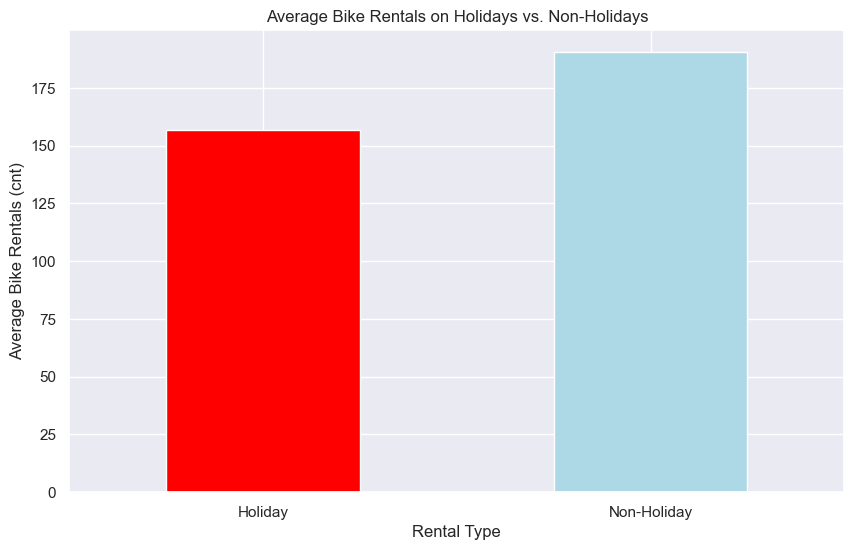

In [193]:
df_hour['rental_type'] = df_hour['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

# Group the data by rental type and calculate the average rentals for each group
rental_type_average = df_hour.groupby('rental_type')['cnt'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
rental_type_average.plot(kind='bar', color=['red', 'lightblue'])
plt.xlabel('Rental Type')
plt.ylabel('Average Bike Rentals (cnt)')
plt.title('Average Bike Rentals on Holidays vs. Non-Holidays')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


### Stacked Area Chart of cumulative report for casual vs registered users across the time span of the dataset
Purpose: Shows which type of user more commonly rents bikes between member users and single users.

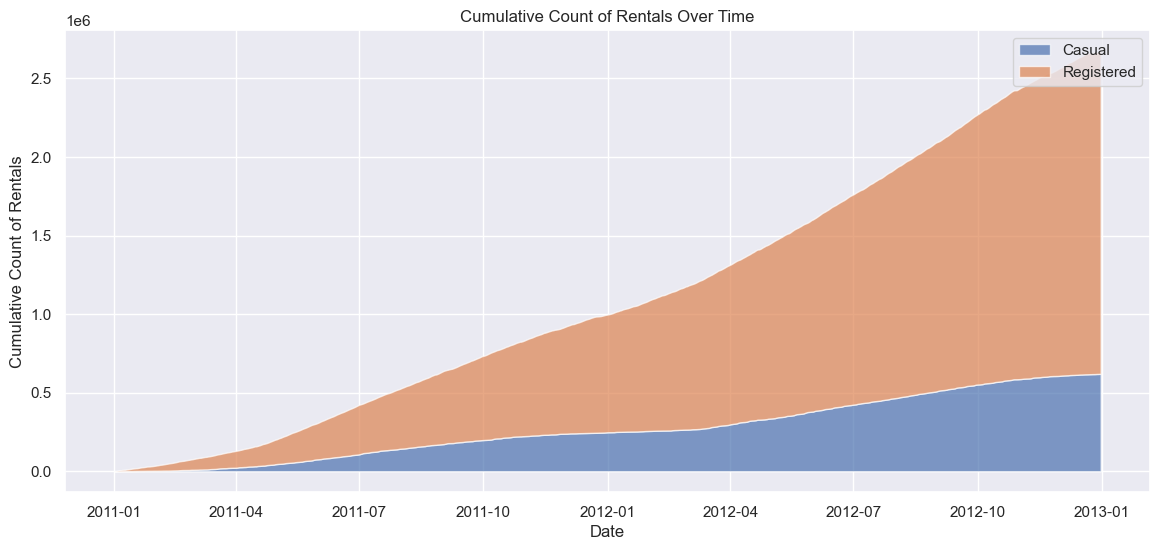

In [194]:
# Create a new column 'date' to store the date in datetime format
df_day['date'] = pd.to_datetime(df_day['dteday'])
df_day.sort_values('date', inplace=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the cumulative counts for casual and registered users as stacked areas
ax.fill_between(df_day['date'], df_day['casual'].cumsum(), label='Casual', alpha=0.7)
ax.fill_between(df_day['date'], df_day['registered'].cumsum(), df_day['casual'].cumsum(), label='Registered', alpha=0.7)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Count of Rentals')
ax.set_title('Cumulative Count of Rentals Over Time')

# Add a legend
ax.legend()
plt.grid(True)

plt.show()


### Bar chart of total revenue by weekday
Purpose: Gives insights as to which weekday produces the most revenue

Text(0.5, 0, 'Weekday')

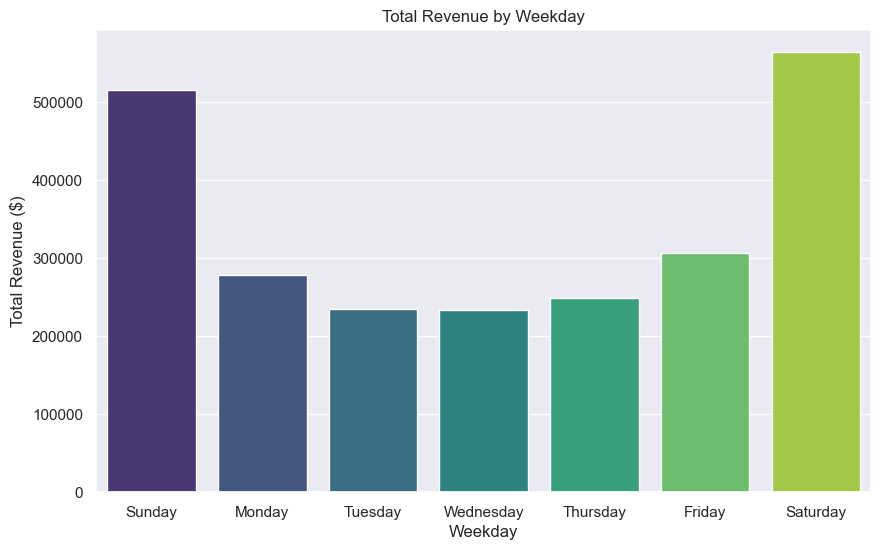

In [195]:
# Make a copy of df_hour to work with the revenue data
revenue_data = df_hour.copy()

# Group by weekday and get sum of total revenue per weekday
revenue_by_weekday = revenue_data.groupby('weekday')['Total_Revenue'].sum().reset_index()

# Map the number in the weekday to its actual day name
weekday_map = {0: 'Sunday', 
               1: 'Monday', 
               2: 'Tuesday', 
               3: 'Wednesday', 
               4: 'Thursday', 
               5: 'Friday', 
               6: 'Saturday'}

revenue_by_weekday['weekday'] = revenue_by_weekday['weekday'].map(weekday_map)

# Sort the dataframe by 'weekday'
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
revenue_by_weekday['weekday'] = pd.Categorical(revenue_by_weekday['weekday'], categories=ordered_days, ordered=True)
revenue_by_weekday = revenue_by_weekday.sort_values('weekday')

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='weekday', y='Total_Revenue', data=revenue_by_weekday, palette='viridis')
plt.title('Total Revenue by Weekday')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Weekday')

### Bar chart of total revenue per hour by day of the week
Purpose: gives insights into which time of day is most profitable

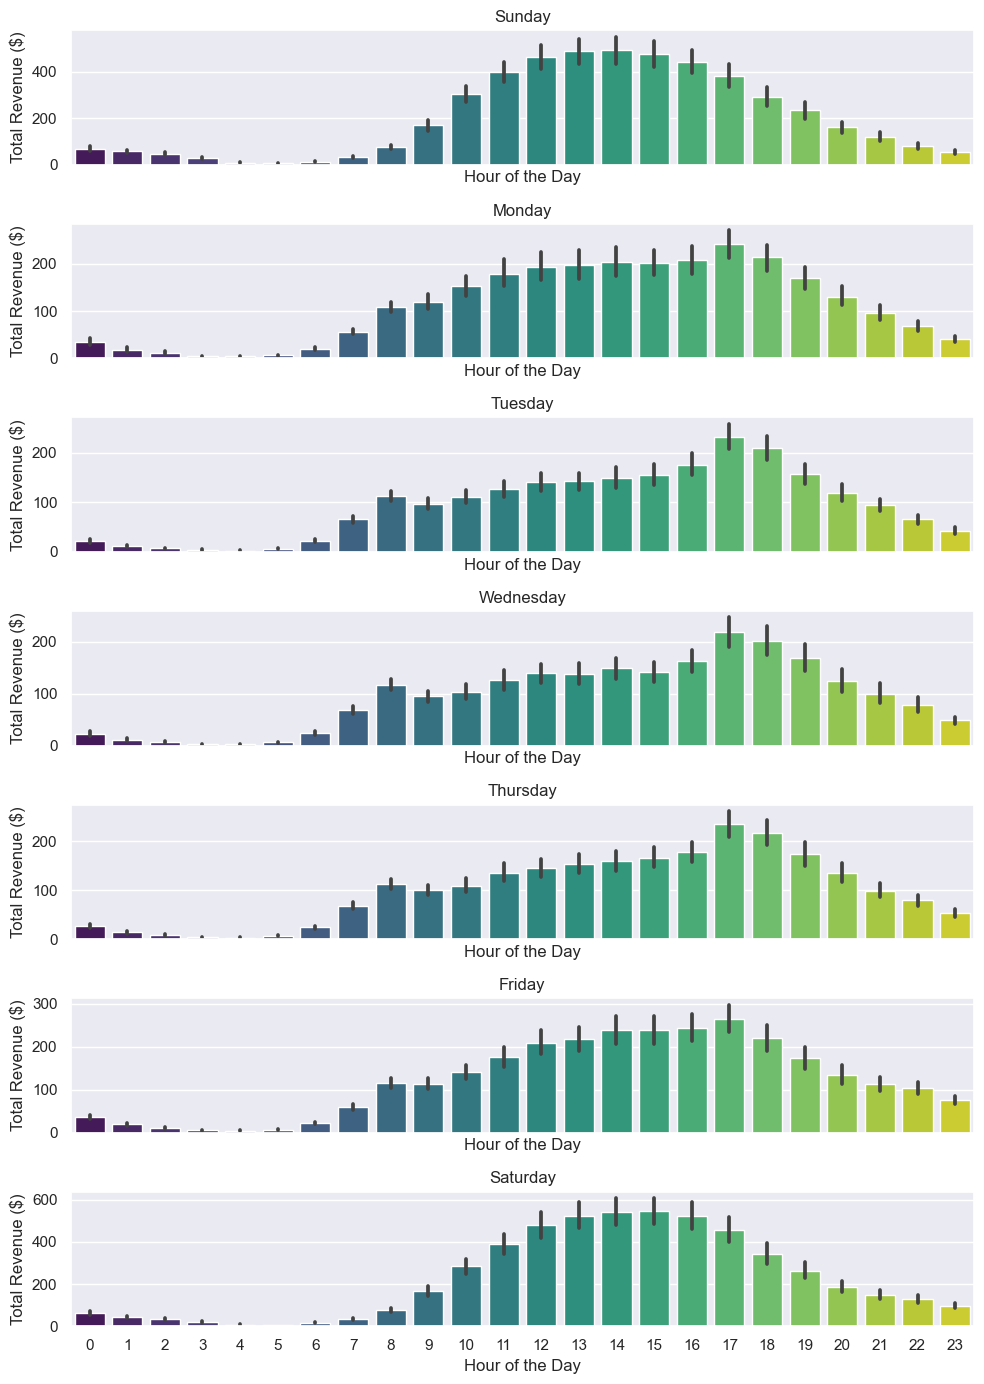

In [196]:
fig, axes = plt.subplots(7, 1, figsize=(10, 14), sharex=True)  

for i, (weekday, group) in enumerate(revenue_data.groupby('weekday')):
    ax = axes[i]
    group = group.sort_values('hr')  # Sort values by hour to make sure they are in order
    sns.barplot(x='hr', y='Total_Revenue', data=group, ax=ax, palette='viridis')
    ax.set_title(weekday_map[weekday])
    ax.set_ylabel('Total Revenue ($)')
    ax.set_xlabel('Hour of the Day')

plt.tight_layout()
plt.show()

### Boxplot of total revenue by month
Purpose: shows data points for revenue amounts per day. The boxplot displays a distribution of the values.

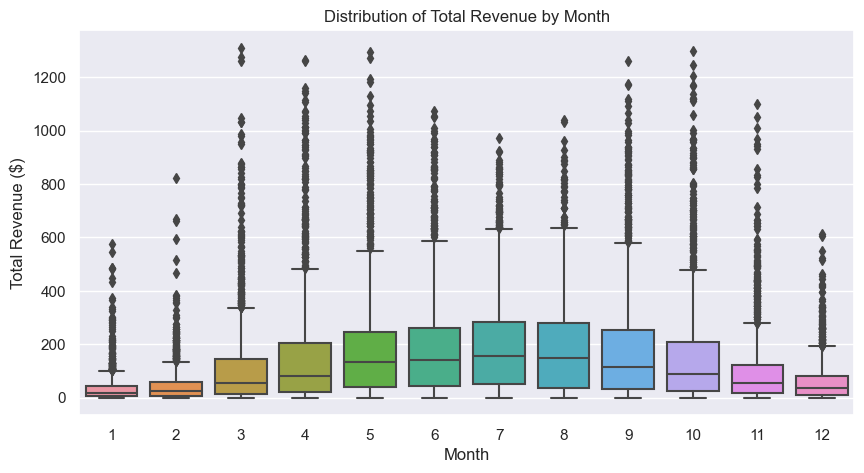

In [197]:
plt.figure(figsize=(10,5))
sns.boxplot(x='mnth', y='Total_Revenue', data=revenue_data)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Distribution of Total Revenue by Month')
plt.show()

### Boxplot of total revenue by season
Purpose: shows data points for revenue amounts per day by season. The boxplot displays a distribution of the values.

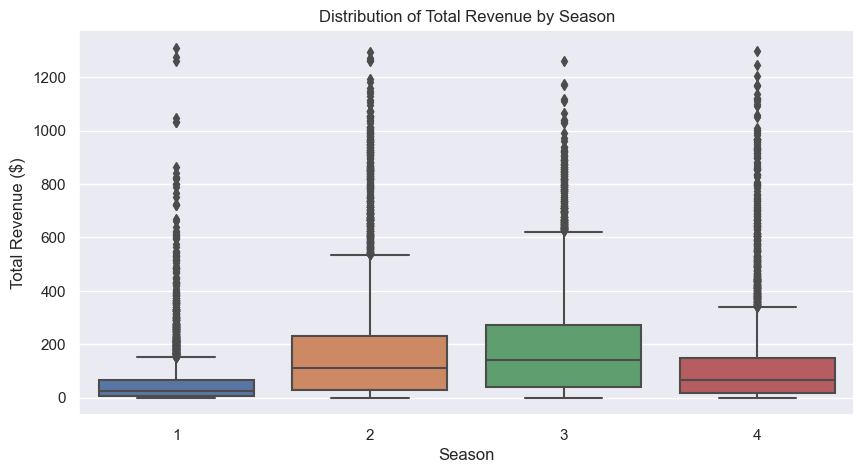

In [198]:
# Map the 'season' column using the dictionary
df_hour['season'] = df_hour['season'].map(season_mapping)

plt.figure(figsize=(10,5))
sns.boxplot(x='season', y='Total_Revenue', data=revenue_data)
plt.xlabel('Season')
plt.ylabel('Total Revenue ($)')
plt.title('Distribution of Total Revenue by Season')
plt.show()

### Line Chart of temperature and month
Purpose: Gives insights into what the average temperatures are like in Washington D.C. by month

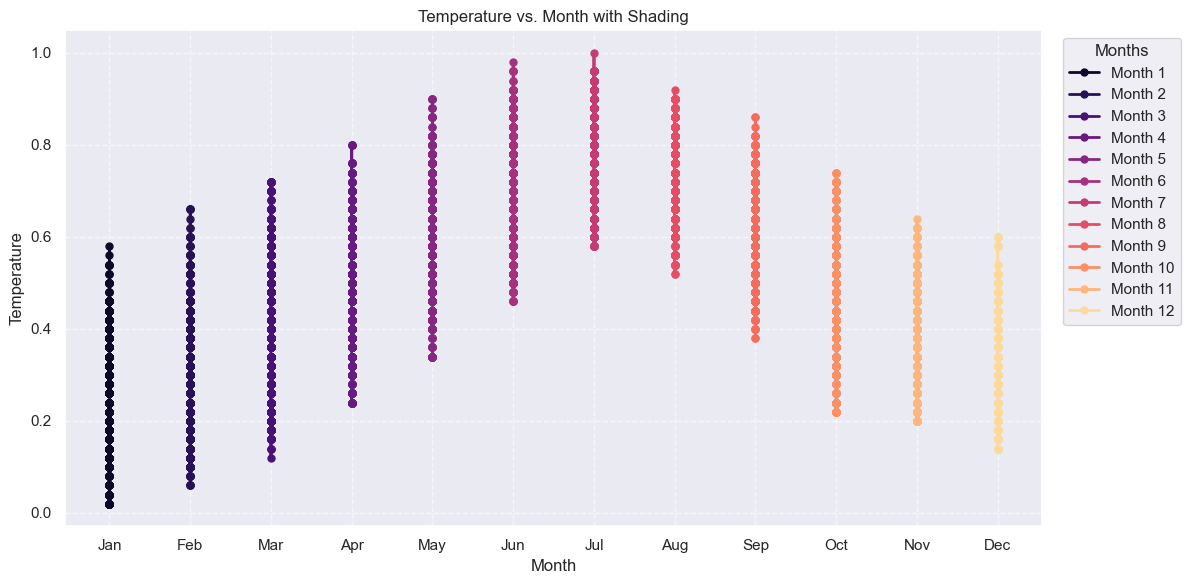

In [199]:
plt.figure(figsize=(12, 6))

# Custom colors for each month
colors = sns.color_palette('magma', n_colors=12)

# Plot temperature vs. month with lines and shading
for month in range(1, 13):
    subset = df_hour[df_hour['mnth'] == month]
    plt.plot(subset['mnth'], subset['temp'], label=f'Month {month}', color=colors[month-1], marker='o', markersize=5, linewidth=2)
    plt.fill_between(subset['mnth'], subset['temp'].min(), subset['temp'].max(), alpha=0.2, color=colors[month-1])

plt.title('Temperature vs. Month with Shading')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Months', loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()




# Data Splitting

Set date formats:

In [200]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['day'] = df_hour['dteday'].dt.day
df_hour.drop(['dteday'], axis=1, inplace=True)

Create target metric:

In [201]:
X = df_hour.drop(['Total_Revenue'], axis=1) 
y = df_hour['Total_Revenue'] 

Split the data with an 80/20 train/test split

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Pre-processing for models

In [203]:
# Drop columns that will not be used in the models
cols_to_drop = [
    'instant', 
    'yr', 
    'mnth', 
    'workingday', 
    'rental_type', 
    'casual', 
    'registered', 
    'Casual_Revenue', 
    'Registered_Revenue'
]

X_train = X_train.drop(cols_to_drop, axis=1)
X_test = X_test.drop(cols_to_drop, axis=1)

# Display X_train dataframe with dropped columns
X_train.head()

season  hr  holiday  weekday  weathersit  temp   atemp   hum  \
6469   winter   3        0        0           3  0.34  0.3182  0.87   
2413   summer  11        1        5           1  0.52  0.5000  0.55   
14293    fall  18        0        4           1  0.74  0.6667  0.48   
10824  summer   3        0        0           2  0.34  0.3333  0.81   
9027   spring   0        0        2           2  0.26  0.2273  0.70   

       windspeed  cnt  year  month  day  
6469      0.2836    9  2011     10    2  
2413      0.1940  136  2011      4   15  
14293     0.2239  941  2012      8   23  
10824     0.1343   25  2012      4    1  
9027      0.3284   12  2012      1   17

Create dummy variables so that the categorical variables can be used in the models

In [204]:
# Create dummies for categorical columns
X_train = pd.get_dummies(X_train, columns=['season', 'weekday', 'weathersit'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['season', 'weekday', 'weathersit'], drop_first=True)

# Add in weathersit_4 into X_test since it was not added automatically
X_test['weathersit_4'] = 0

Scale features for use in the models

In [205]:
# Scale variables
scaler = StandardScaler()
features_to_scale = ['temp', 'atemp', 'hum', 'windspeed']
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

In [206]:
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

### Support Vector Machine (SVM) Regression

Note: Hypertuning proved to be too computationally intensive for SVM. It would be impractical to run this model testing out different fold and iteration amounts for this data because it would need a few hours to run. Therefore, while this model is a good starting point, it is not the optimal model for this data.

In [207]:
# Initialize SVR using radial basis function (RBF) as a kernal
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Fit the model
svr.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [208]:
# Make Predictions
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [209]:
# Evaluate Performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 1.8332345086764985
Test RMSE: 128.5372891130423


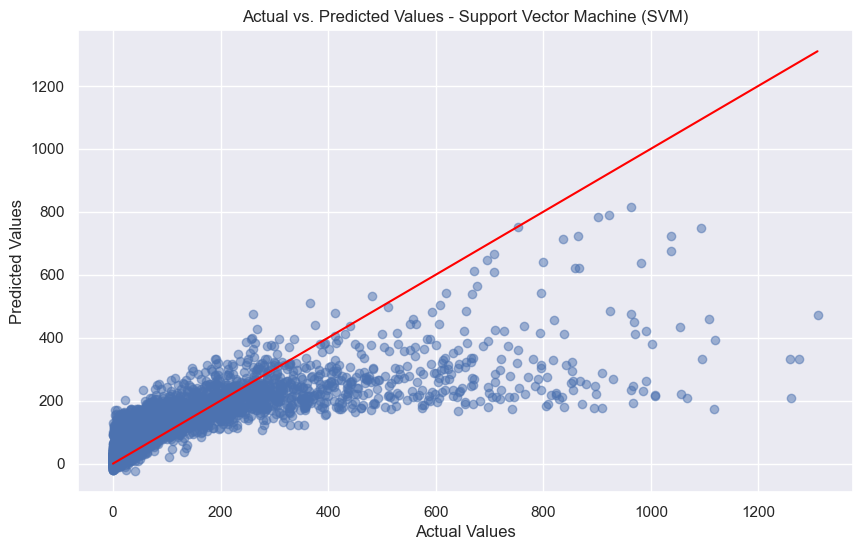

In [210]:
# Actual vs predicted plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Support Vector Machine (SVM)')
plt.show()

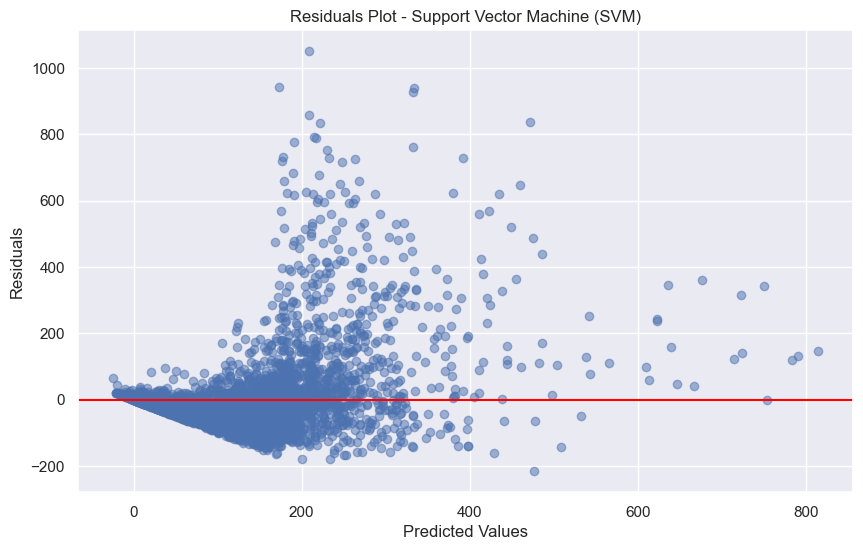

In [211]:
# Residuals Plot
residuals = y_test - y_test_pred

plt.figure(figsize=(10,6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot - Support Vector Machine (SVM)')
plt.show()

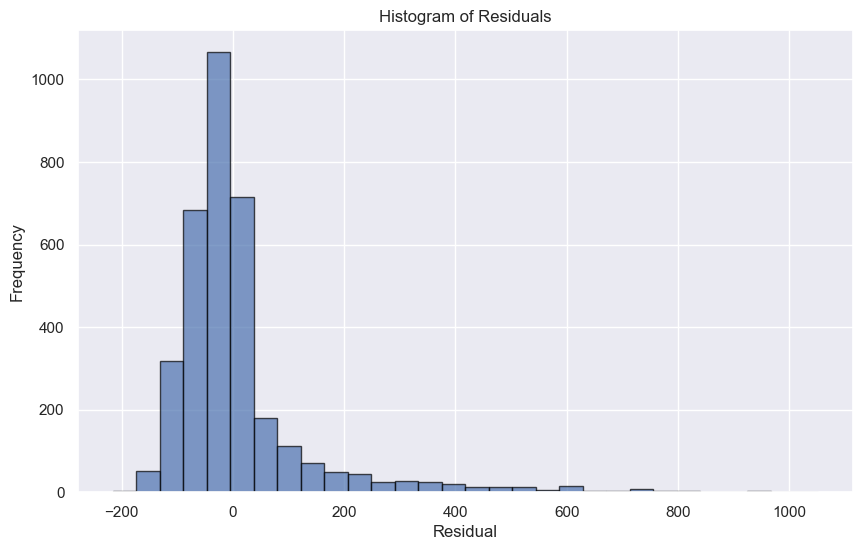

In [212]:
# Histogram of Residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Note: The below feature importance method for SVM is too computationally intensive to be used. The runtime is too long for what we want. We will not use it, but the code is here to show what the set-up looks like. 

In [213]:
# from sklearn.inspection import permutation_importance

# # Compute permutation importances
# perm_importance = permutation_importance(svr, X_test, y_test, n_repeats=30, random_state=0, scoring='neg_mean_squared_error')

# # Get importances and indices
# sorted_idx = perm_importance.importances_mean.argsort()

# # Visualizing feature importances
# plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")
# plt.show()


### Neural Networks

In [214]:
# Set data types for model to usability
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Need to set weathersit_4 for X_test since X_train contains it
X_test['weathersit_4'] = 0.0

In [215]:
def build_model(hp: HyperParameters):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=32),
                           activation='relu', input_shape=(X_train.shape[1],)))
    
    for i in range(hp.Int('num_layers', 1, 4)):  # Number of hidden layers
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
                               activation='relu'))

    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=5,  
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuning'
)

# Start the search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on test data
loss, mae = best_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Predictions using the best model
y_pred = best_model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Trial 7 Complete [00h 00m 33s]
val_mae: 47.15188217163086

Best val_mae So Far: 46.1053466796875
Total elapsed time: 00h 08m 39s
109/109 [==============================] - 0s 2ms/step - loss: 6945.1665 - mae: 46.2392
Test Loss (MSE): 6945.1665
Mean Absolute Error: 46.2392
109/109 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 46.2392
Mean Squared Error (MSE): 6945.1655
Root Mean Squared Error (RMSE): 83.3377
R-squared: 0.8037


In [216]:
# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')  
])

In [217]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Use MSE as loss, MAE as metric

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
348/348 [==============================] - 2s 3ms/step - loss: 15483.8457 - mae: 77.1893 - val_loss: 14004.4258 - val_mae: 72.4310
Epoch 2/10
348/348 [==============================] - 1s 3ms/step - loss: 13835.4121 - mae: 72.1359 - val_loss: 15137.6250 - val_mae: 78.9577
Epoch 3/10
348/348 [==============================] - 1s 3ms/step - loss: 13269.7812 - mae: 70.4279 - val_loss: 12751.1240 - val_mae: 68.1285
Epoch 4/10
348/348 [==============================] - 1s 4ms/step - loss: 12446.6982 - mae: 67.3803 - val_loss: 12117.5234 - val_mae: 63.5915
Epoch 5/10
348/348 [==============================] - 1s 3ms/step - loss: 11884.5527 - mae: 67.2256 - val_loss: 12471.0752 - val_mae: 78.6290
Epoch 6/10
348/348 [==============================] - 1s 3ms/step - loss: 11219.8301 - mae: 65.8508 - val_loss: 10258.7793 - val_mae: 58.4886
Epoch 7/10
348/348 [==============================] - 1s 3ms/step - loss: 10574.9434 - mae: 63.1616 - val_loss: 10633.3398 - val_mae: 66.6265
Epoch 

In [218]:
# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

109/109 [==============================] - 0s 2ms/step - loss: 8333.7734 - mae: 53.4770
Test Loss (MSE): 8333.7734
Mean Absolute Error: 53.4770


In [219]:
# Predictions
y_pred = model.predict(X_test)
y_pred

109/109 [==============================] - 0s 2ms/step


array([[139.52386 ],
       [ 12.031307],
       [ 44.61598 ],
       ...,
       [194.92824 ],
       [583.58655 ],
       [ 21.370312]], dtype=float32)

In [220]:
# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Setting squared=False gives RMSE in sklearn 0.22+
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Absolute Error (MAE): 53.4770
Mean Squared Error (MSE): 8333.7725
Root Mean Squared Error (RMSE): 91.2895
R-squared: 0.7645


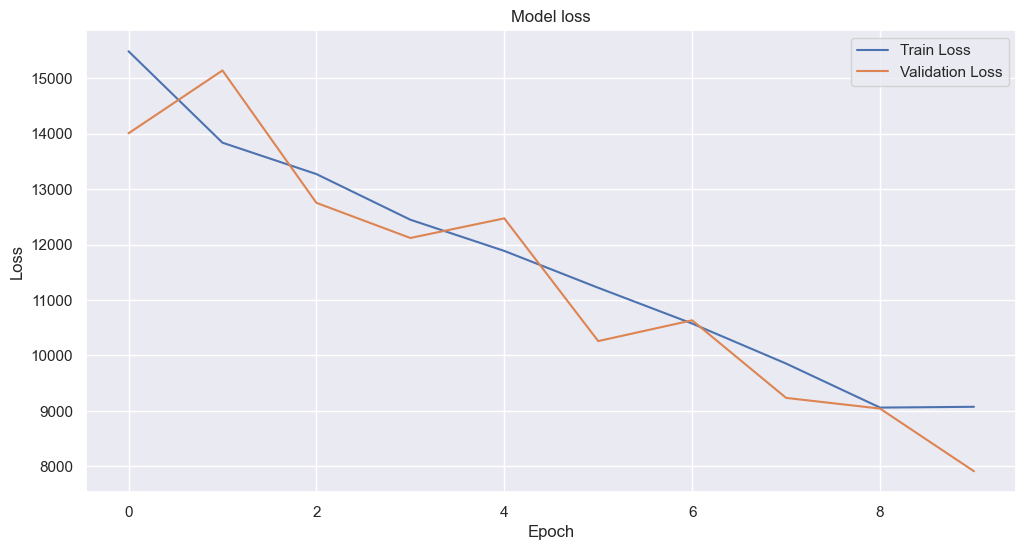

In [221]:
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

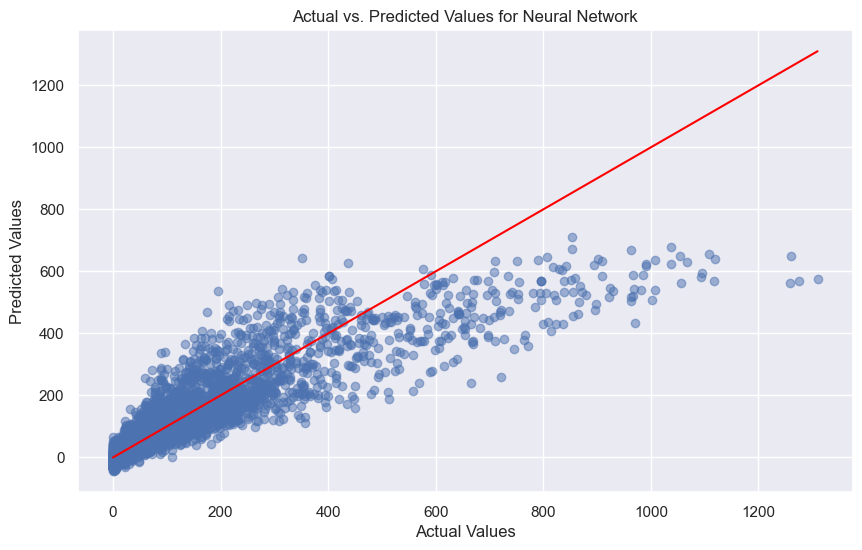

In [222]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Neural Network')
plt.show()

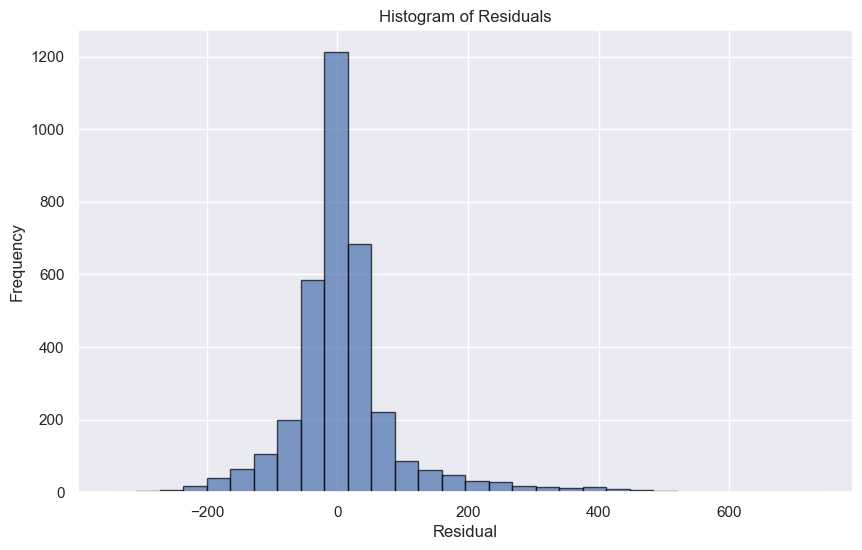

In [223]:
residuals = y_test - y_pred.squeeze()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

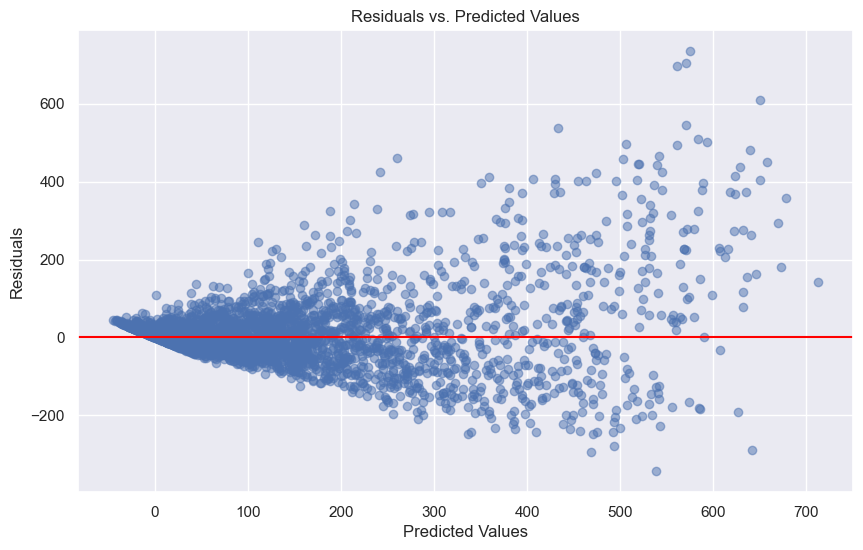

In [224]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

Below is a connection weights approach to getting feature importance for the neural networks model:

Text(0.5, 0, 'Feature Importance based on Connection Weights')

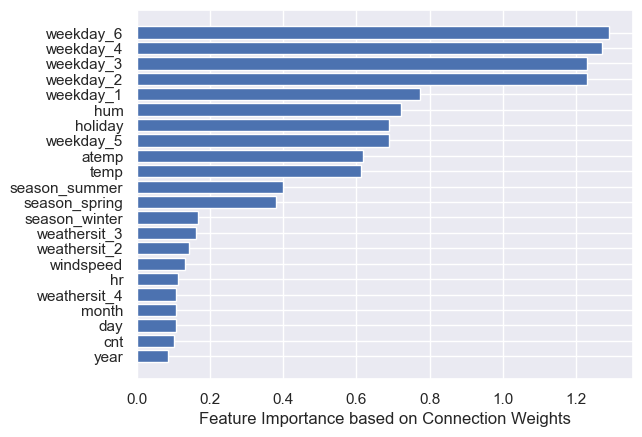

In [225]:
def get_feature_importances(model):
    # Get the absolute values of the first-layer weights
    first_layer_weights = model.layers[0].get_weights()[0]
    # Take the mean of the absolute values for each feature across all output nodes
    importance = np.mean(np.abs(first_layer_weights), axis=1)
    return importance

# Get importances
importances = get_feature_importances(model)

# Get feature names and sort indices by importance
feature_names = X_train.columns
sorted_idx = np.argsort(importances)

# Visualize feature importances
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance based on Connection Weights")

### Ridge Regression 

### Ridge Regression is a model which prevents coefficients from becoming too large by adding a penalty which shrinks them and prevents overfitting. This adds stability to the model and makes it more adaptive to new data sets. The hyperparameter alpha is iterated here, which represents the shrinkage. 

In [226]:
# Range of alphas for tuning
alphas = np.logspace(-6, 6, 13)

# Create RidgeCV model with a range of alphas. RidgeCV automatically finds alpha 
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Get the best alpha value selected by RidgeCV
best_alpha = ridge_cv.alpha_
ridge = Ridge(alpha=best_alpha)

# Fit our Ridge model training set
ridge.fit(X_train, y_train)

# Make predictions
y_pred_rr = ridge.predict(X_test)

# Print the results
print("Best alpha from RidgeCV:", best_alpha)

Best alpha from RidgeCV: 1.0


/Users/kevinbaum/ENTER/envs/ADS505/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.3963e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### Ridge Regression Feature Importance

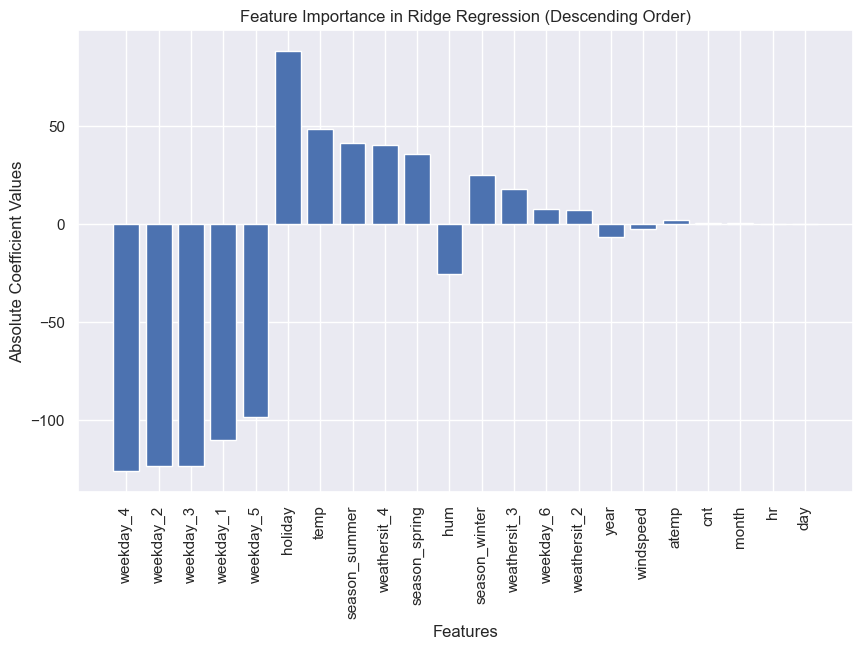

In [227]:
# Calculate the coefficients
coef_abs = np.abs(ridge.coef_)

# Sort feature importances in descending order regardless of neg or pos correlation
sorted_indices = np.argsort(coef_abs)[::-1]
sorted_coef = ridge.coef_[sorted_indices]
feature_names = X_train.columns.tolist()
sorted_features = [feature_names[i] for i in sorted_indices]

# Create a bar plot of feature importances. This shows importance both negative and positive. 
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_coef)), sorted_coef)
plt.xticks(range(len(sorted_coef)), sorted_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Values")
plt.title("Feature Importance in Ridge Regression (Descending Order)")
plt.show()


### Here we see that the most influential variables are mostly negatively correlated with Total_Revenue, including weekday_4 (thursday), and weekday_2(tuesday). The feature with the highest positive correlation is holiday, followed by temperature. 

In [228]:
# Calculate Scores 
mae = mean_absolute_error(y_test, y_pred_rr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rr))
r2 = r2_score(y_test, y_pred_rr)
mse = mean_squared_error(y_test, y_pred_rr)


#Print them all
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 10363.121043526253
Root Mean Squared Error (RMSE): 101.79941573273518
Mean Absolute Error (MAE): 69.56694459283605
R-squared (R^2): 0.707143168049303


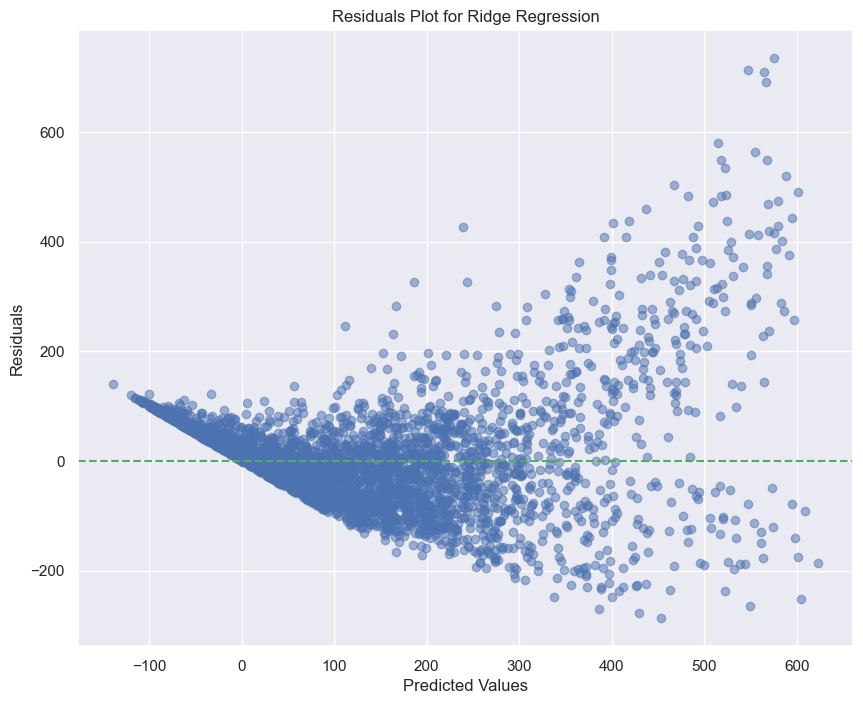

In [229]:
# Calculate the residuals for ridge
residuals = y_test - y_pred_rr  

# Create a scatter plot of residuals
plt.figure(figsize=(10, 8))
plt.scatter(y_pred_rr, residuals, alpha=0.5)
plt.title('Residuals Plot for Ridge Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='g', linestyle='--') 
plt.show()

### Lasso Regression

### Lasso Regression also works to shrink the coefficients and prevent them from becoming too large, but also automatically selects for the most important features by setting the coefficients of the non-important features to 0. Alpha is again used here as for hyperparameter tuning for shrinkage. 

Best alpha from Lasso CV: 0.012115276586285901


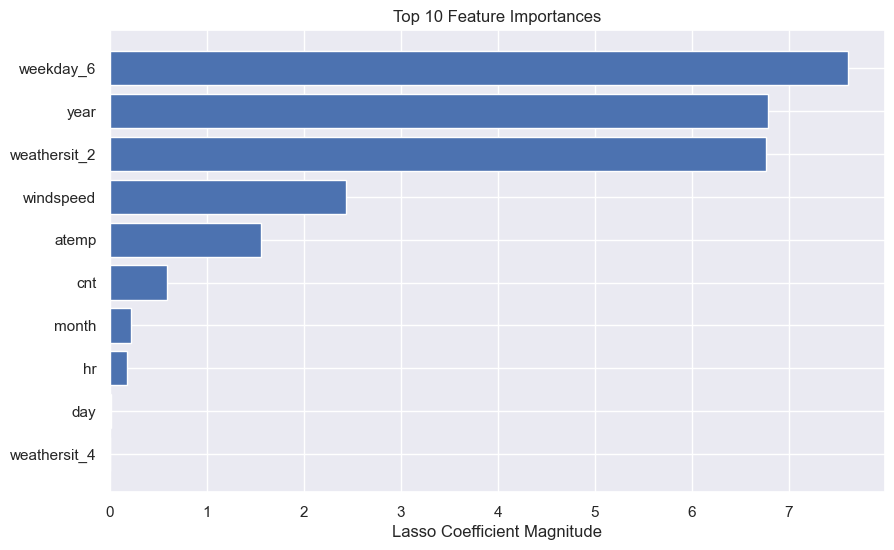

In [230]:
# Alpha tuning 
param_grid = {
    'alpha': np.logspace(-9, 8, 13)  
}

# Lasso model
lasso = Lasso()

# Do a grid search for lasso 
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value 
best_alpha = grid_search.best_params_['alpha']

# Create a Lasso model with the best alpha
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test)

print("Best alpha from Lasso CV:", best_alpha)


# Get feature importances
feature_importances_rr = np.abs(lasso.coef_)

# Sort feature importances in descending order
sorted_feature_importances_rr = np.argsort(-feature_importances_rr)

# Reverse the order to get it descending
sorted_feature_importances_rr = sorted_feature_importances_rr[::-1]

# Get the corresponding feature names
feature_names_rr = X_train.columns 

# Visualize the top 10 important features
N = 10  
plt.figure(figsize=(10, 6))
plt.barh(range(N), feature_importances_rr[sorted_feature_importances_rr[:N]])
plt.yticks(range(N), [feature_names_rr[i] for i in sorted_feature_importances_rr[:N]])
plt.xlabel("Lasso Coefficient Magnitude")
plt.title("Top {} Feature Importances".format(N))
plt.show()


### Here we see the most important variable is weekday_6 (Saturday), along with year and weathersit_2, which is 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds. 

In [231]:
# Calculate evaluation metrics for Lasso
maelr = mean_absolute_error(y_test, y_pred_lasso)
mselr = mean_squared_error(y_test, y_pred_lasso)
rmselr = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2lr = r2_score(y_test, y_pred_lasso)

# Print metrics
print(f"Mean Absolute Error (MAE): {maelr}")
print(f"Mean Squared Error (MSE): {mselr}")
print(f"Root Mean Squared Error (RMSE): {rmselr}")
print(f"R-squared (R2): {r2lr}")

Mean Absolute Error (MAE): 69.54651516140497
Mean Squared Error (MSE): 10364.708336837735
Root Mean Squared Error (RMSE): 101.80721161508028
R-squared (R2): 0.7070983119013698


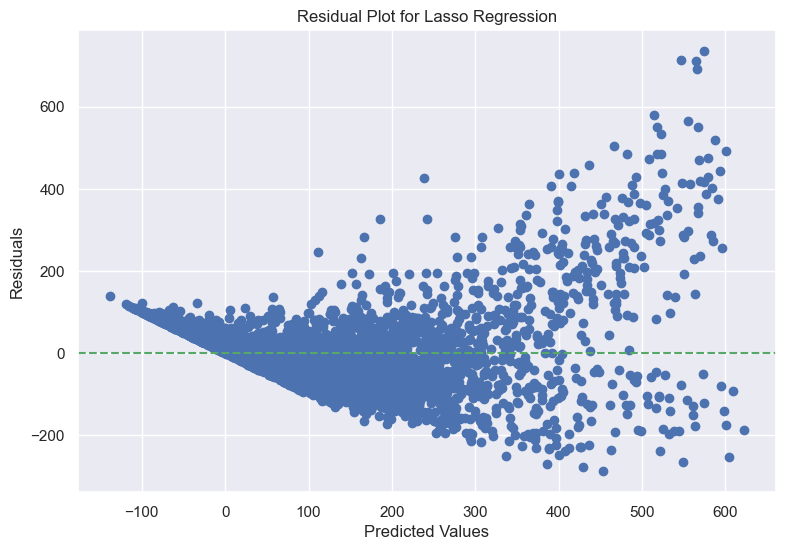

In [232]:
# Residual Plot 

# Calculate the residuals
residuals_lasso = y_test - y_pred_lasso

# Create a residual plot
plt.figure(figsize=(9, 6))
plt.scatter(y_pred_lasso, residuals_lasso)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Lasso Regression")
plt.axhline(y=0, color='g', linestyle='--')
plt.show()

### Random Forest
The Random Forest model is being used as a regression model for the project. It is being used to predict bike sharing demands, leveraging the provided features, such as weather conditions, temperature, day of the week to name a few in order to make these predictions. The ultimate goal is the gain insights into factors affecting bike rentals and to develop a predictive model.

In [233]:
# Build and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2104.9938132455786
R-squared (R2): 0.9405138841055982


#### Feature Importance Plot

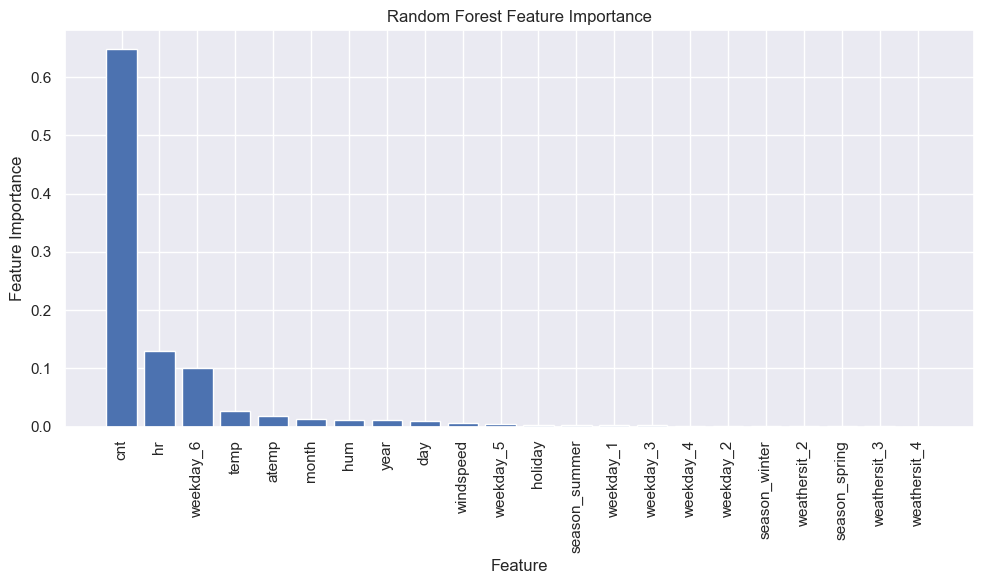

In [234]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


#### Prediction vs. Actual Plot

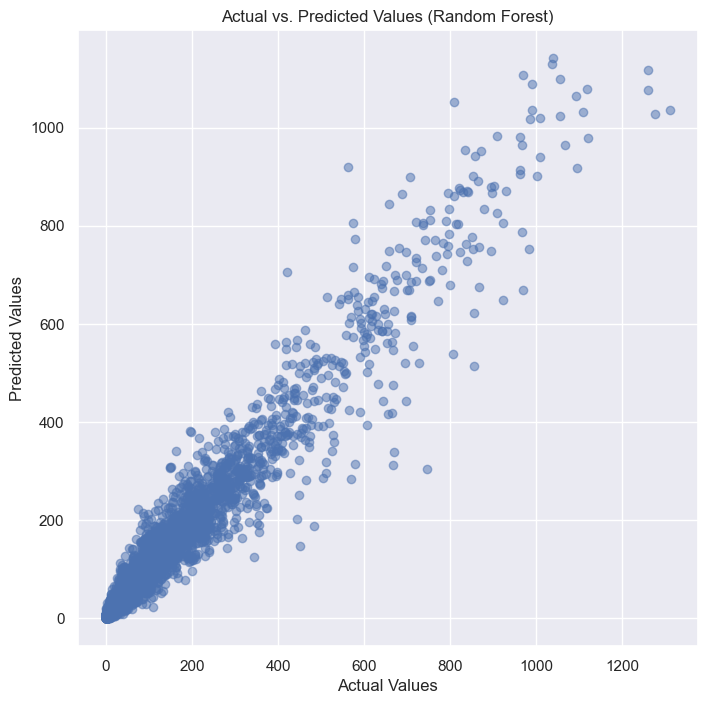

In [235]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Random Forest)")
plt.show()

#### Residual Plot

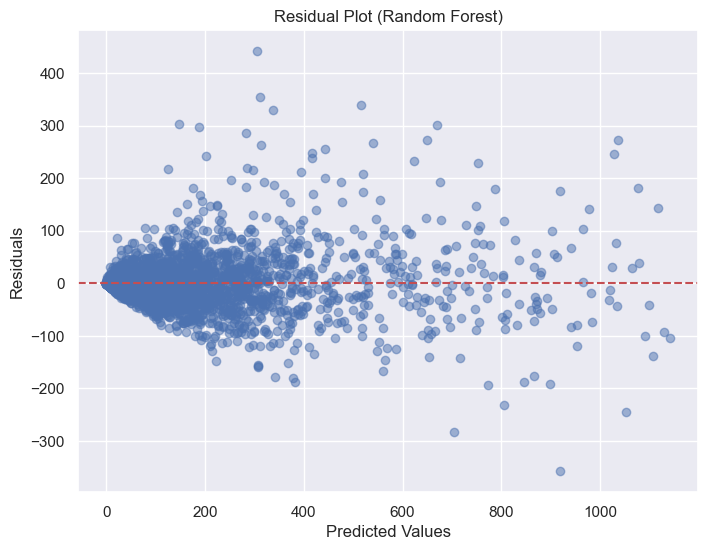

In [236]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Multiple Linear Regression
Multiple Linear Regression is a classical statistical and machine learning model with its own set of advantages. It results are easily interpretable and it allows each predictor variable to be understood with regards to bike rental counts. It can also help to identify which factors have a significant impact on demand. It is a straightforward way to explain the contributionns of each predictor variable and will provide a good baseline model. It is quick, but is also requires validation of assumptions and evaluation of the models performance.

In [237]:
# Create and train the Multiple Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Evaluate the model
y_pred = linear_regression_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 10362.52990317234
R-squared (R2): 0.7071598733922744


### Plot

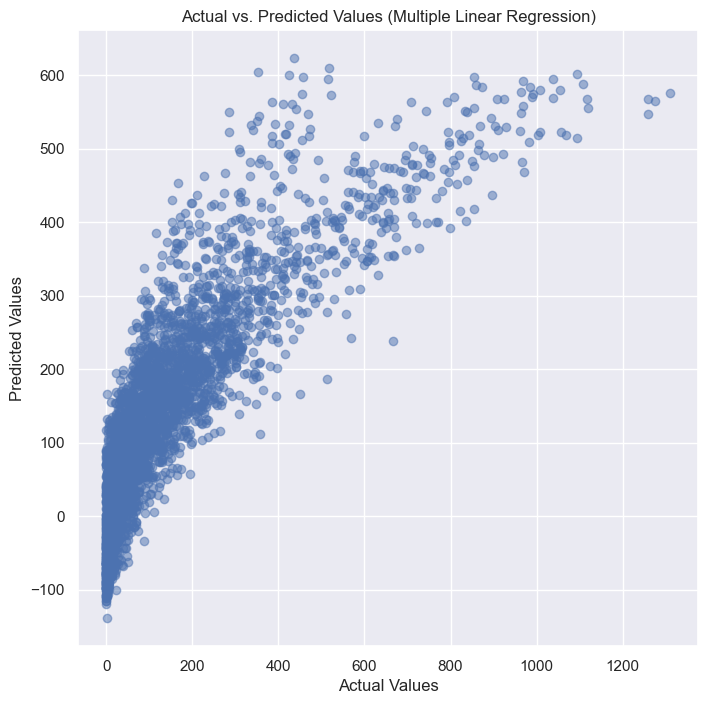

In [238]:
# Create a figure and set its size
plt.figure(figsize=(8, 8))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)

# Label the x-axis and y-axis
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add a title to the plot
plt.title("Actual vs. Predicted Values (Multiple Linear Regression)")

# Display the plot
plt.show()

#### Residual Plot

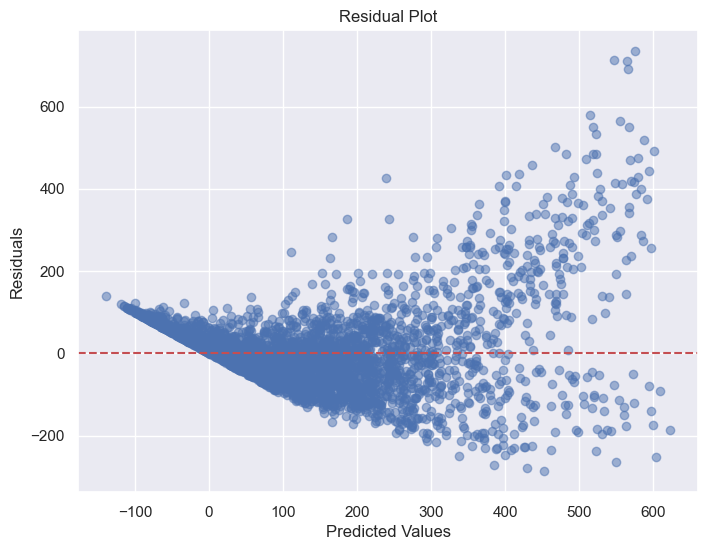

In [239]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

#### Histogram of Residuals

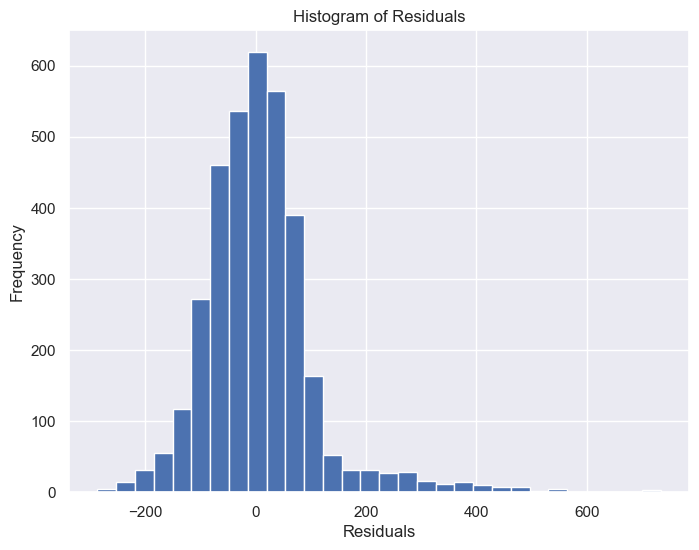

In [240]:
# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

#### Feature Importance

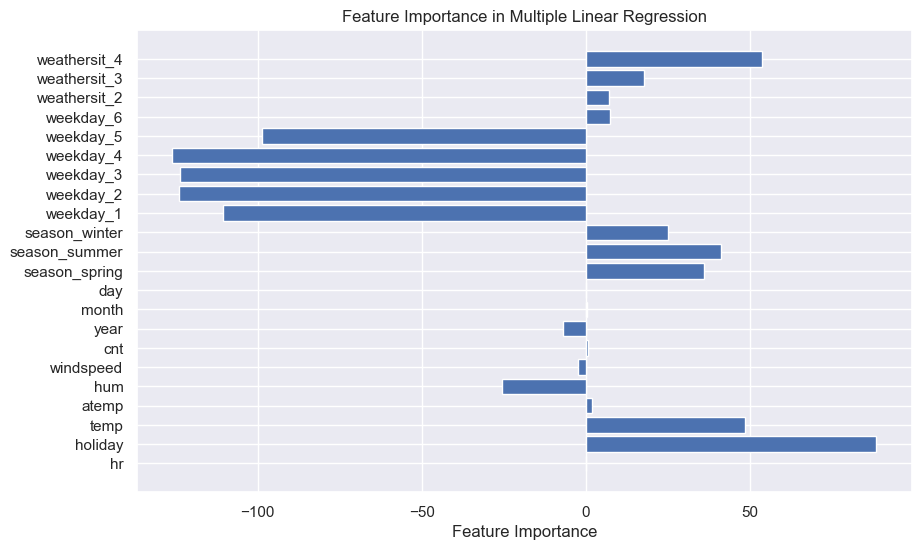

In [241]:
# Assuming you have a linear regression model named 'linear_regression_model'
feature_importance = linear_regression_model.coef_

# Create a bar chart to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Multiple Linear Regression")
plt.show()

In [242]:
X_train.head()

hr  holiday      temp     atemp       hum  windspeed    cnt    year  \
6469    3.0      0.0 -0.818407 -0.919591  1.256287   0.771858    9.0  2011.0   
2413   11.0      1.0  0.115654  0.137227 -0.405895   0.037442  136.0  2011.0   
14293  18.0      0.0  1.257284  1.106269 -0.769498   0.282520  941.0  2012.0   
10824   3.0      0.0 -0.818407 -0.831814  0.944628  -0.451896   25.0  2012.0   
9027    0.0      0.0 -1.233546 -1.448001  0.373253   1.139066   12.0  2012.0   

       month   day  season_spring  season_summer  season_winter  weekday_1  \
6469    10.0   2.0            0.0            0.0            1.0        0.0   
2413     4.0  15.0            0.0            1.0            0.0        0.0   
14293    8.0  23.0            0.0            0.0            0.0        0.0   
10824    4.0   1.0            0.0            1.0            0.0        0.0   
9027     1.0  17.0            1.0            0.0            0.0        0.0   

       weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
6469         0.0        0.0        0.0        0.0        0.0           0.0   
2413         0.0        0.0        0.0        1.0        0.0           0.0   
14293        0.0        0.0        1.0        0.0        0.0           0.0   
10824        0.0        0.0        0.0        0.0        0.0           1.0   
9027         1.0        0.0        0.0        0.0        0.0           1.0   

       weathersit_3  weathersit_4  
6469            1.0           0.0  
2413            0.0           0.0  
14293           0.0           0.0  
10824           0.0           0.0  
9027            0.0           0.0